<h2 align="center"> EL7006 Redes Neuronales y Teorı́a de Información para el Aprendizaje
Control 1, Pregunta 1 </h2>

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pylab as plt

def train_regressor(x, z, Wi, method='MSE', sigma=1.0, lr=0.01, niter=1000):    
    global fx
    w1 = Wi[0]
    w2 = Wi[1]
    w3 = Wi[2]
    IEP = np.zeros(shape=(niter,))    
    N = len(x)
    for k in xrange(0, niter):
        e = z - (w1 + w2*x + w3*x**2)
        IEP[k] = np.mean(np.power(w1 + w2*x + w3*x**2 - a - b*x - c*x**2, 2.0))
        if method is 'MCC':
            ge = np.exp(-0.5*np.power(e, 2.0)/sigma**2)/(np.sqrt(2.0*np.pi)*sigma**3)
            # Additional -1.0 in the gradients because we are doing gradient descent (not ascent)
            gradw1 = -1.0*np.sum(np.multiply(ge, e))/N
            gradw2 = -1.0*np.sum(np.multiply(np.multiply(ge, e), x))/N
            gradw3 = -1.0*np.sum(np.multiply(np.multiply(ge, e), x**2))/N
        elif method is 'MSE':
            gradw1 =  -2.0*np.sum(e)/N
            gradw2 =  -2.0*np.sum(np.multiply(e, x))/N
            gradw3 =  -2.0*np.sum(np.multiply(e, x**2))/N
        w1 -= lr*gradw1
        w2 -= lr*gradw2
        w3 -= lr*gradw3
    return [w1, w2, w3], IEP

### Generación de datos de entrenamiento

In [2]:
a = -3.0 
b = 5.0
c = -2.0
N = 100
x = np.linspace(-2.0, 2.0, num=N);
fx = a + b*x + c*x**2
nu = np.random.randn(N,)*np.std(fx)*0.25
nu[np.random.rand(N,) > 0.8] += 10.0*np.std(fx)*0.25
z = fx + nu

### Entrenamiento de los regresores

In [3]:
wi = np.random.rand(3);
# 1000 iterations of MSE
[wMSE, IEPE] = train_regressor(x, z, wi, method='MSE', lr=0.01, niter=1000);
# 200 iterations of MSE + 800 iterations of MEE
[w_tmp, IEPE_tmp] = train_regressor(x, z, wi, method='MSE', lr=0.01, niter=200);
[wMCC, IEPC] = train_regressor(x, z, w_tmp, method='MCC', sigma=2.0, lr=1.0, niter=800);

### Gráficas de desempeño 

<IPython.core.display.Javascript object>


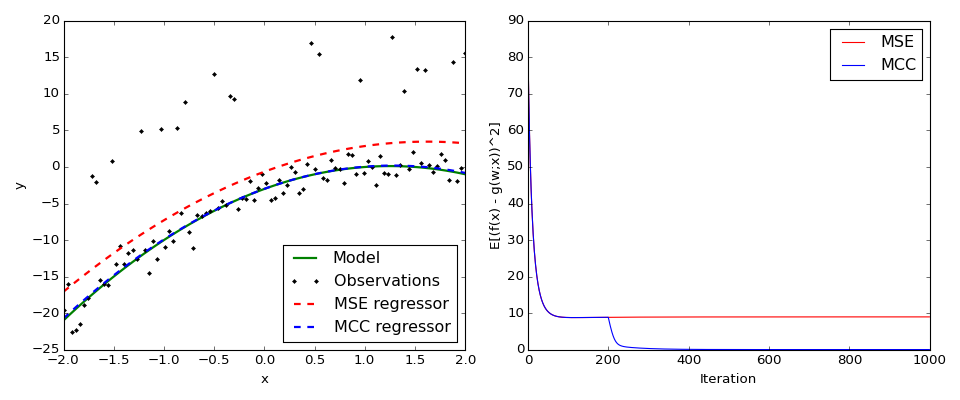

Comparison between regressor weights:
a = -3.0000, b = 5.0000, c = -2.0000
MSE: w1 = -0.6424, w2 = 5.0789, w3 = -1.5684
MEE: w1 = -2.9881, w2 = 4.9787, w3 = -1.9462


In [4]:
plt.close()
fig = plt.figure(figsize=(12, 5), dpi=80)
ax = fig.add_subplot(1, 2, 1)
ax.plot(x, fx, 'g-', label='Model', linewidth=2)
ax.plot(x, z, 'k.', label='Observations ')
ax.plot(x, wMSE[0] + wMSE[1]*x + wMSE[2]*x**2, 'r--', label='MSE regressor', linewidth=2)
ax.plot(x, wMCC[0] + wMCC[1]*x + wMCC[2]*x**2, 'b--', label='MCC regressor', linewidth=2)
#ax.plot(x,w1C*x+w2C*x.^2,'b--');
plt.xlabel('x'); 
plt.ylabel('y');
plt.legend(loc='lower right')
ax = fig.add_subplot(1, 2, 2);
ax.plot(np.arange(0, len(IEPE), step=1), IEPE, 'r-', label='MSE')
ax.plot(np.arange(0, len(IEPE), step=1), np.concatenate((IEPE_tmp, IEPC)), 'b-', label='MCC')
plt.xlabel('Iteration');
plt.ylabel('E[(f(x) - g(w;x))^2]')
plt.legend()
print("Comparison between regressor weights:")
print("a = %0.4f, b = %0.4f, c = %0.4f"  % (a, b, c))
print("MSE: w1 = %0.4f, w2 = %0.4f, w3 = %0.4f"  % (wMSE[0], wMSE[1], wMSE[2]))
print("MEE: w1 = %0.4f, w2 = %0.4f, w3 = %0.4f"  % (wMCC[0], wMCC[1], wMCC[2]))
plt.tight_layout()

### Gráficas de la FDP del error

<IPython.core.display.Javascript object>


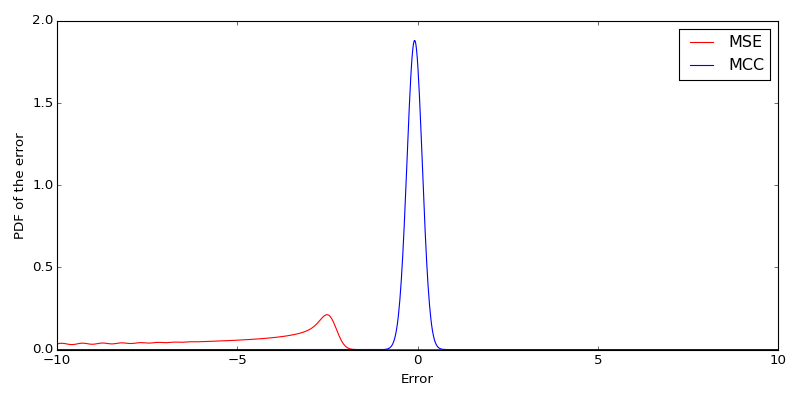

In [8]:
plt.close()
from sklearn.neighbors.kde import KernelDensity

x_plot = np.linspace(-10, 10, 1000)[:, np.newaxis]
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
fig = plt.figure(figsize=(10, 5), dpi=80)
ax = fig.add_subplot(1, 1, 1)
kde.fit((fx - wMSE[0] - wMSE[1]*x - wMSE[1]*x**2)[:, np.newaxis])
ax.plot(x_plot, np.exp(kde.score_samples(x_plot)), 'r-', label='MSE')
kde.fit((fx - wMCC[0] - wMCC[1]*x - wMCC[2]*x**2)[:, np.newaxis])
ax.plot(x_plot, np.exp(kde.score_samples(x_plot)), 'b-', label='MCC')
plt.xlabel('Error')
plt.ylabel('PDF of the error');
plt.legend()
plt.tight_layout()